# Data Analysis and Visualization Notebook

This Jupyter Notebook is dedicated to the analysis and visualization of customer data from the `DM2425_ABCDEats_DATASET.csv` file. The notebook includes various steps to clean, analyze, and visualize the data to extract meaningful insights.

## Table of Contents

1. **Importing Packages and Data**
    - Import necessary libraries such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
    - Load the dataset into a DataFrame.

2. **Feature Engineering**
    - Create new features such as `delta_day_order`, `tot_value_cui`, `order_freq`, `value_freq`, `avg_order_value` and `avg_order_value`
    - Append these new features to a list for further analysis.

3. **Descriptive Statistics for DOW Features**
    - Check for NaN and infinite values in the DOW features.
    - Describe the DOW features to understand their statistical properties.

4. **Days of the week VS Regions**
    - Explore regional differences in ordering behavior by days of the week.
    - Summarize customer region statistics by different days.
    - Visualize the distribution and impact of the customer region on the days they placed a order.
    .

5. **Days vs Age**
    - Understand how age groups behave in relation to ordering times.
    - Analyze and visualize the impact of customer age on order behavior by the days of the week.
    - Create a heatmap to see the distribution of the order placing by the days of the week for the differente ages.
    

## Key Variables

- `df`: The main DataFrame containing the customer data.
- `noNaN_df`: DataFrame after removing rows with NaN values.
- `new_fetures_list`: List of newly engineered features.
- `region_stats`: DataFrame summarizing statistics for different regions.
- `age_order_freq`, `age_order_value_mean`, `age_value_freq`, etc.: DataFrames containing age-related metrics.
- `avg_age_per_region`, `avg_order_value_per_region`, etc.: Series containing region-related metrics.

This notebook provides a comprehensive analysis of customer data, focusing on age and region-specific insights, and employs various visualization techniques to present the findings effectively.

# 1. importing packages and data


In [20]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
file_path = 'DM2425_ABCDEats_DATASET.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path)
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Summarise key statistics for the data frame

In [22]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

# 2. Features Engineering

In [23]:
new_fetures_list = []

### delta_day_order
shows the time passed beween the first order and the last order
-- note:
we could adjust the parameter by using the highest day for the last order in the dataframe as today

In [24]:

df['delta_day_order'] = df['last_order'] - df['first_order'] + 1
new_fetures_list.append('delta_day_order')

### tot_value_cui
shows the total amunt of money spent on the app across all options

In [25]:
cui_columns = [col for col in df.columns if col.startswith('CUI')]
df['tot_value_cui'] = df[cui_columns].sum(axis=1)
new_fetures_list.append('tot_value_cui')

### frequencies and averages
more insightful informations about our customers habits

In [26]:
df['order_freq'] = df['product_count'] / df['delta_day_order']
df['value_freq'] = df['tot_value_cui'] / df['delta_day_order']
df['avg_order_value'] = df['tot_value_cui'] / df['product_count']
df['Recency'] = 90 - df['last_order']

new_fetures_list.append('order_freq')
new_fetures_list.append('value_freq')
new_fetures_list.append('avg_order_value')

In [27]:
# Check if NaN is better than 0
df['avg_order_value'] = np.where(df['product_count'] != 0, df['tot_value_cui'] / df['product_count'], 0)

# Replace '-' with NaN
df['customer_region'].unique()
df.replace('-', np.nan, inplace=True)

Check if there are Duplicare rows

In [28]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
    print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
else:
    print("No duplicate rows found.")

# Drop duplicate rows
df.drop_duplicates(inplace=True)

Duplicate rows found:
      customer_id customer_region  customer_age  vendor_count  product_count  \
3379   b55012ee1c            8550          23.0             4             11   
7887   24251eb7da            8550          28.0             4              8   
16230  671bf0c738            8550          25.0             4              7   
20907  742ca068fc            8550          20.0             1              2   
24329  df91183978            8550          23.0             2              3   
24827  6bbf5f74cd            8550          22.0            10             20   
25793  8aa9bbc147            8550          24.0             2              4   
27515  cf563a0a98            8550          27.0             2              2   
27739  201a13a34d            8550          28.0             2              2   
28713  06018a56be            8550          27.0             2              2   
29926  fac7984c0d            8550          29.0             1              1   
30416  b8e7a643a4 

In [29]:
df.head(10)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,delta_day_order,tot_value_cui,order_freq,value_freq,avg_order_value,Recency
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2.0,28.88,2.500000,14.440000,5.776000,89
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,19.21,1.000000,9.605000,9.605000,89
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,9.20,1.000000,4.600000,4.600000,89
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3.0,31.56,1.000000,10.520000,10.520000,88
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,NaN,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,55.44,1.666667,18.480000,11.088000,88
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,24.92,0.666667,8.306667,12.460000,88
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,NaN,CARD,5.88,0.00,1.53,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3.0,7.41,0.666667,2.470000,3.705000,88
7,f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.0,36.11,1.000000,12.036667,12.036667,88
8,5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.0,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,4.0,14.44,1.000000,3.610000,3.610000,87
9,84775a7237,8670,20.0,2,3,0,0.0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,32.48,0.750000,8.120000,10.826667,87


# Days of the Week Analysis


# 3. Descriptive Statistics for DOW Feature
##### Objective: Summarize the key characteristics of the DOW feature.

In [30]:
dow_columns = [col for col in df.columns if col.startswith('DOW')]
df[dow_columns].isna().sum()
# None of the DOW columns have NaN values

DOW_0    0
DOW_1    0
DOW_2    0
DOW_3    0
DOW_4    0
DOW_5    0
DOW_6    0
dtype: int64

In [31]:
sum_dow = df[dow_columns].sum()
mean_dow = df[dow_columns].mean()
min_dow= df[dow_columns].min()
max_dow = df[dow_columns].max()
percentile_25_dow = df[dow_columns].quantile(0.25)
percentile_75_dow = df[dow_columns].quantile(0.75)

# Combine the statistics into a DataFrame
hour_stats = pd.DataFrame({
    'Total Orders': sum_dow,
    'Average Orders Placed by a client': mean_dow,  #should i leave the average
    'Minimal Order Placed by a client': min_dow,
    'Maximum Order Placed by a client': max_dow,
    '25th Percentile': percentile_25_dow,
    '75th Percentile': percentile_75_dow
    
})

hour_stats

,Total Orders,Average Orders Placed by a client,Minimal Order Placed by a client,Maximum Order Placed by a client,25th Percentile,75th Percentile
DOW_0,17720,0.555922,0,16,0.0,1.0
DOW_1,18091,0.567561,0,17,0.0,1.0
DOW_2,18836,0.590933,0,15,0.0,1.0
DOW_3,19743,0.619388,0,17,0.0,1.0
DOW_4,21607,0.677867,0,16,0.0,1.0
DOW_5,20813,0.652957,0,20,0.0,1.0
DOW_6,22453,0.704408,0,20,0.0,1.0


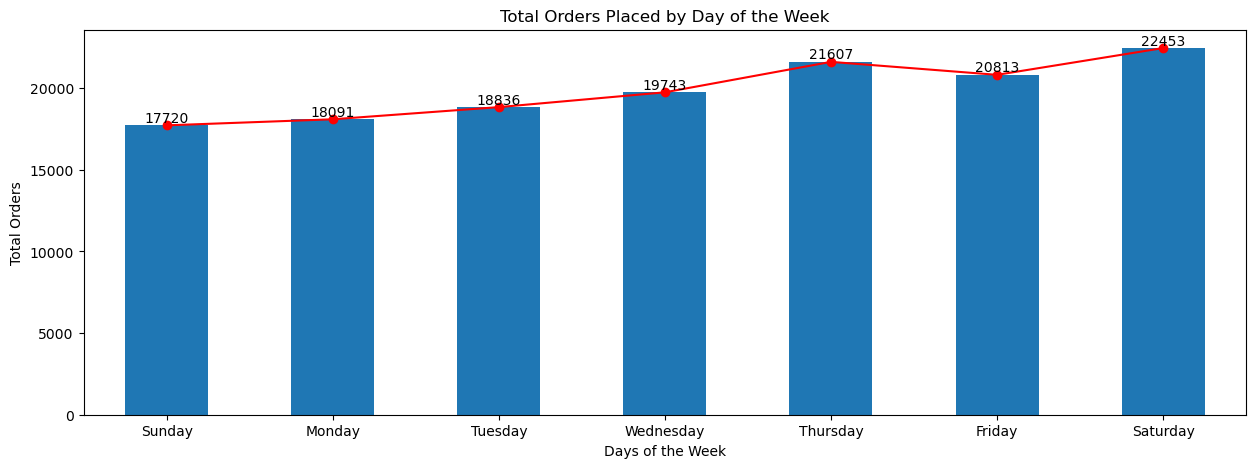

In [32]:
#'days' variable
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']


df[dow_columns].sum().plot(kind='bar')
plt.title('Total Orders Placed by Day of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Total Orders')
for index, value in enumerate(df[dow_columns].sum()):
    plt.text(index, value, str(value), ha='center', va='bottom')
df[dow_columns].sum().plot(kind='line', color='red', marker='o')
plt.xticks(ticks=np.arange(len(days)), labels=days)
plt.gcf().set_size_inches(15, 5)  # Set the figure size to be larger horizontally
plt.show()



Through the analysis of the graph, we can verify that the days of the week are a factor that influences the customers' ordering behavior.

As the weekend approaches, customers place a higher number of orders, reaching the peak on thursdays and Saturdays. On Sundays, the number of orders drops significantly.

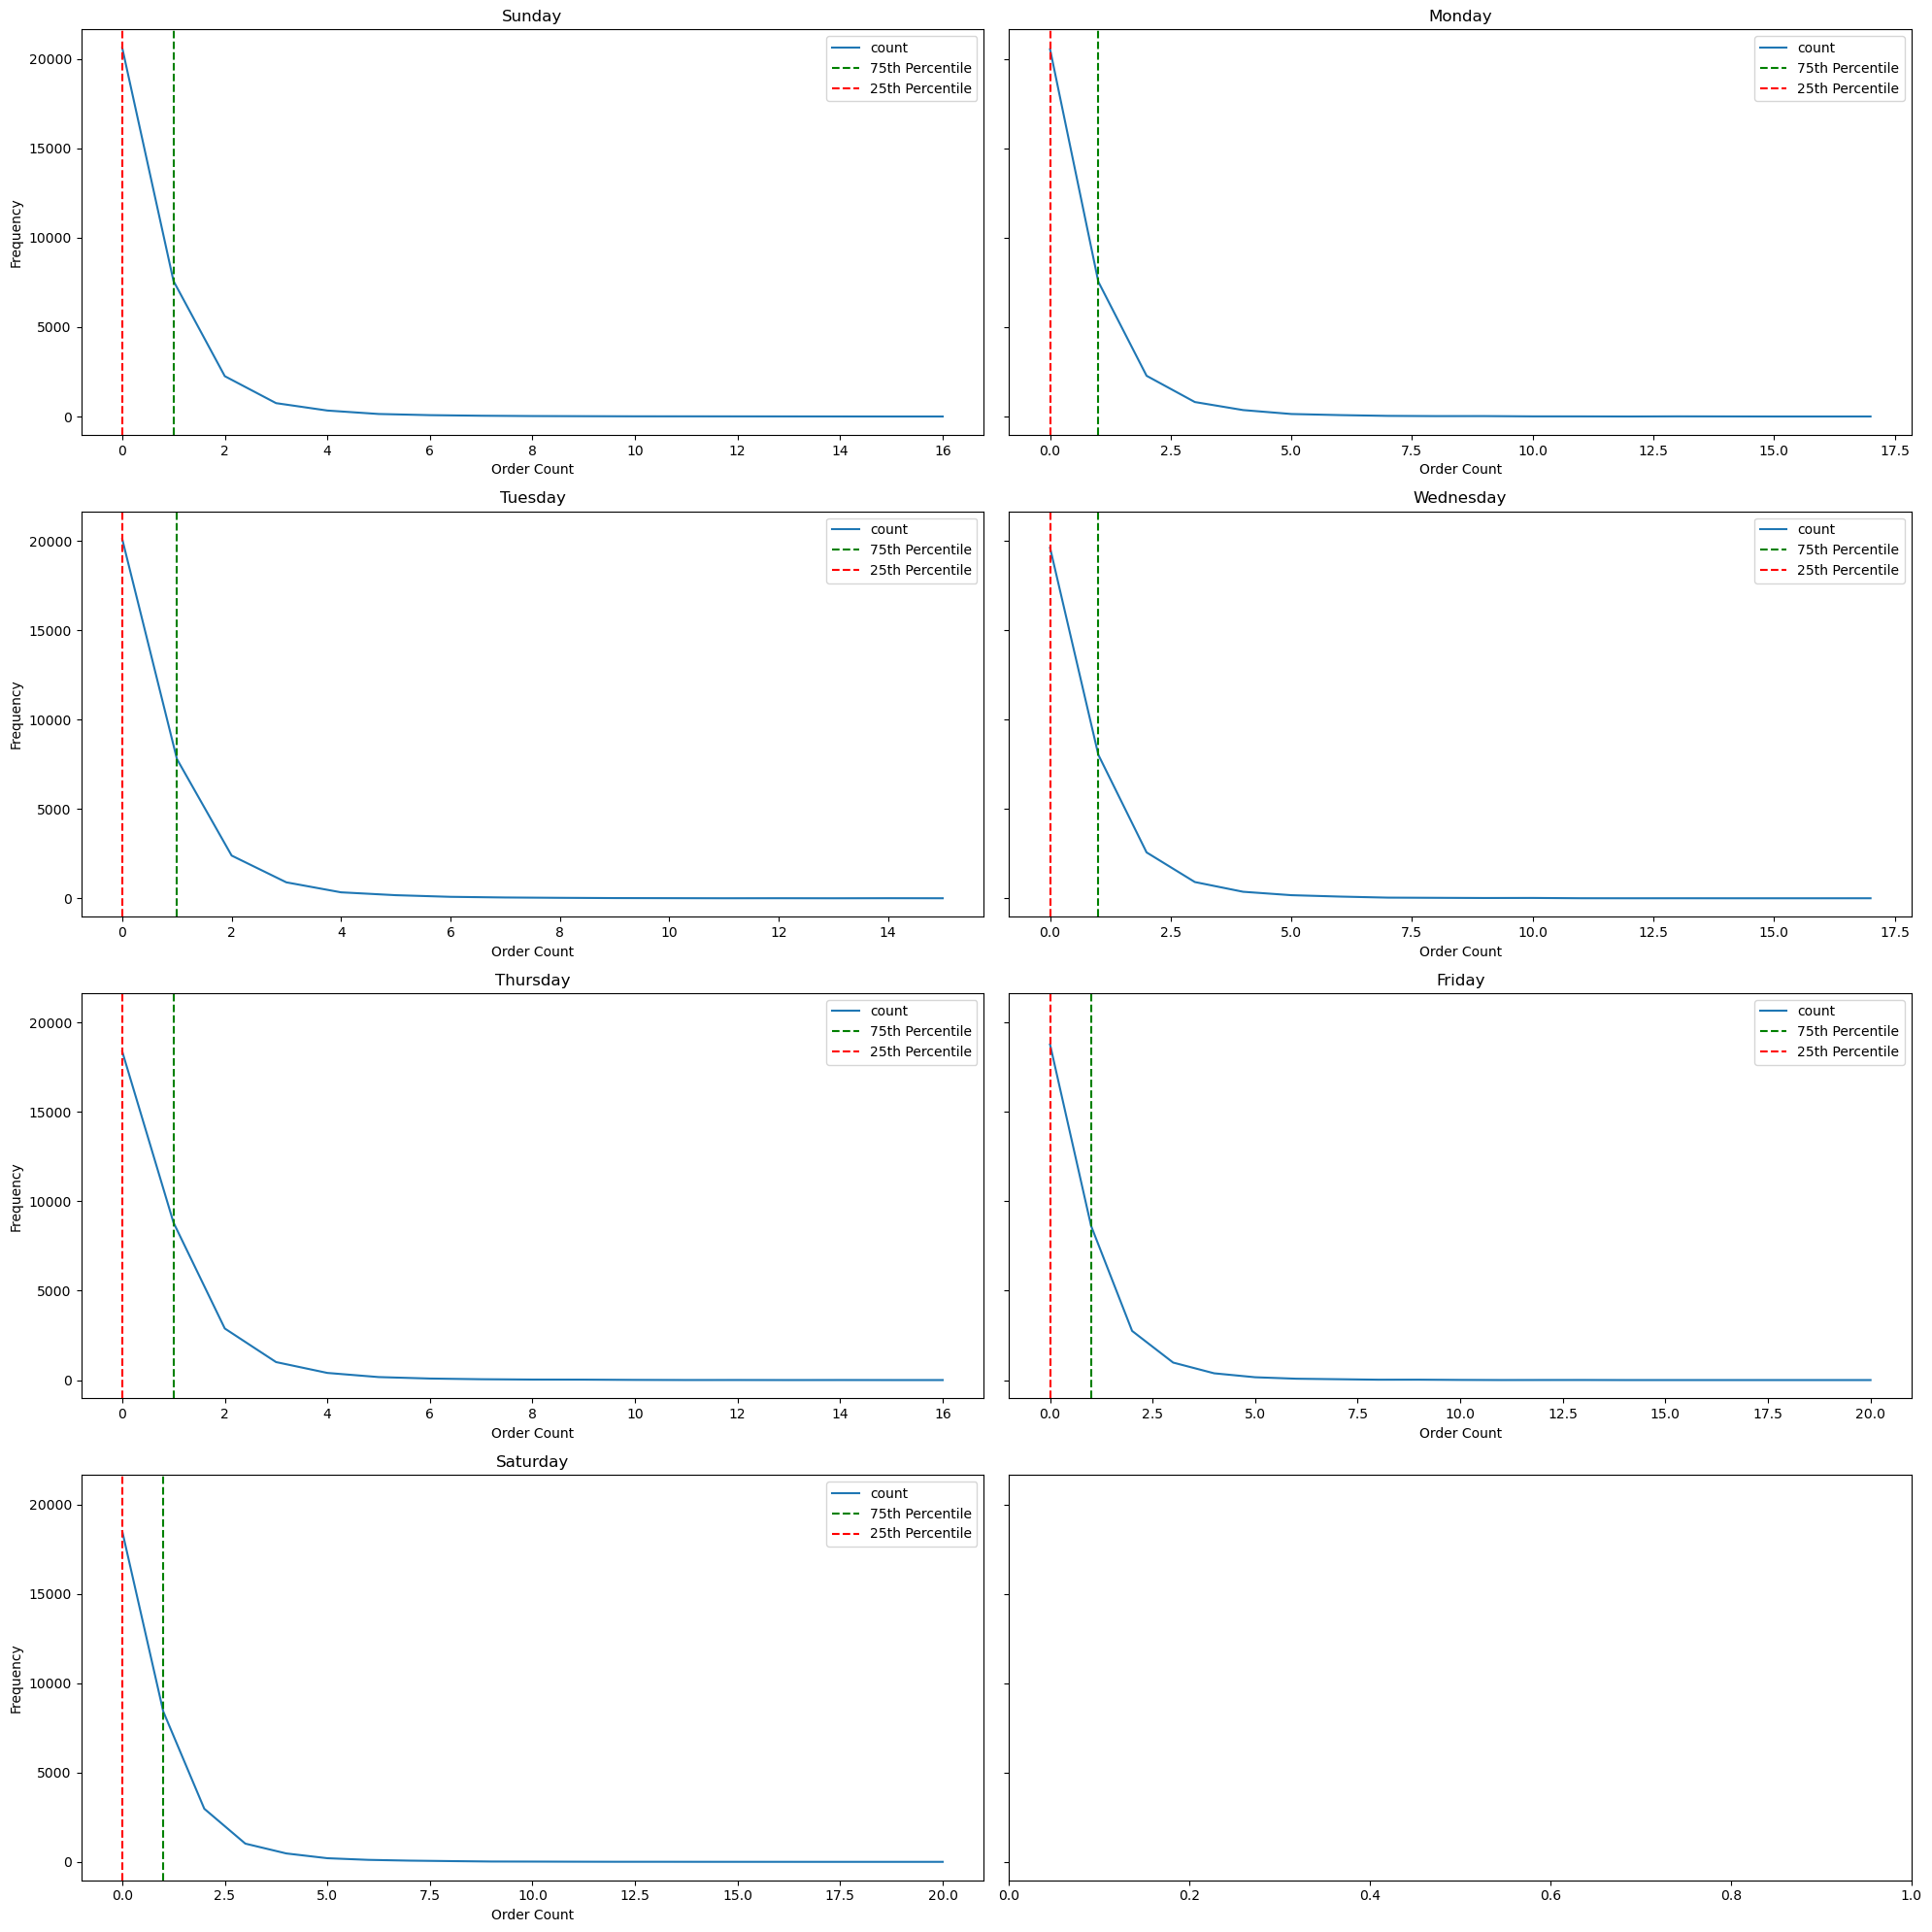

In [33]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20), sharey=True)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Iterate over each DOW column and create a bar plot
for i, col in enumerate(dow_columns):
    df[col].value_counts().sort_index().plot(kind='line', ax=axes[i])
    day_name = days[i]
    axes[i].set_title(day_name)
    axes[i].set_xlabel('Order Count')
    axes[i].set_ylabel('Frequency')
    
    # Calculate percentiles
    percentile_25 = df[col].quantile(0.25)
    percentile_75 = df[col].quantile(0.75)
    
    # Add percentile lines
    axes[i].axvline(percentile_75, color='g', linestyle='--', label='75th Percentile')
    axes[i].axvline(percentile_25, color='r', linestyle='--', label='25th Percentile')
    
    # Add legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

As we can see by the images, 75% of the clients placed less than 1 order for all the days

# 4. Days of the Week vs. Regions
##### Objective: Explore regional differences in ordering behavior by day.

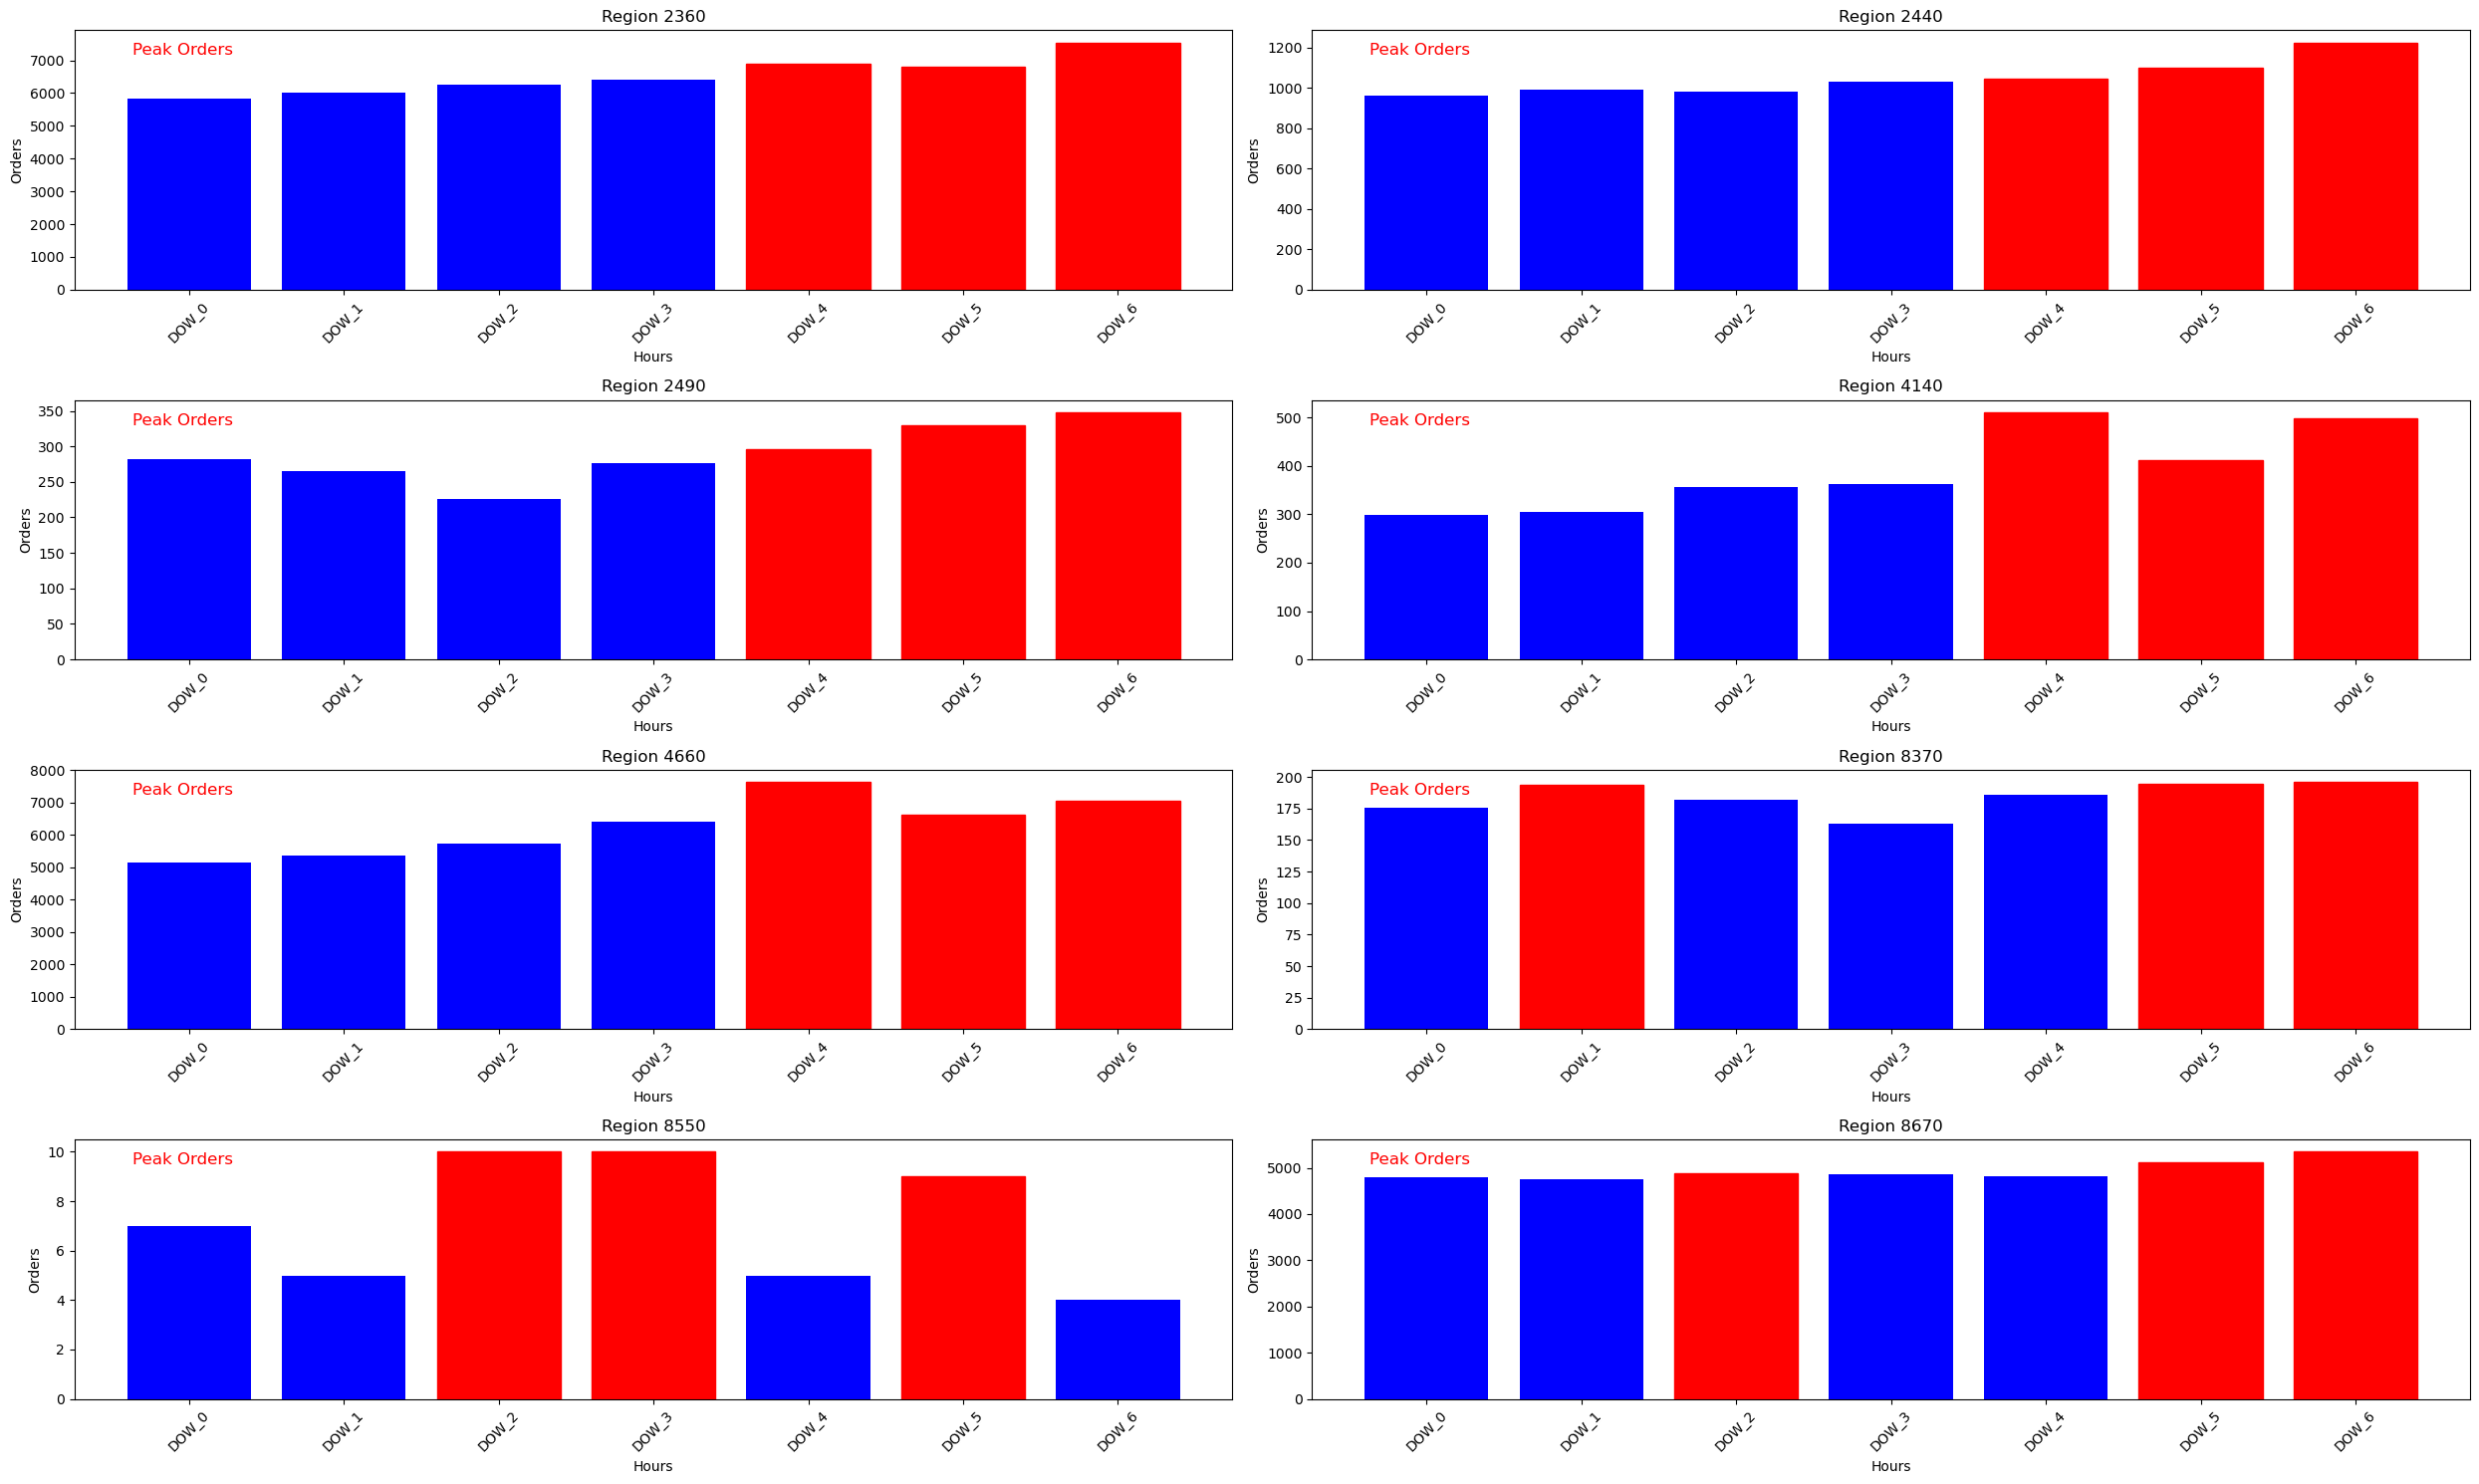

In [34]:
region_dow_sum = df.groupby('customer_region')[dow_columns].sum()

# Define o número de regiões e subplots
num_regions = len(region_dow_sum)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 15))  # Aumenta o tamanho para 18x14

# Garante que o gráfico tenha um layout limpo
axes = axes.flatten()  # Achata os eixos para iteração

# Plota os histogramas de cada região em seu subplot respectivo
for idx, (region, data) in enumerate(region_dow_sum.iterrows()):
    # Ordena os dias pela quantidade de pedidos e seleciona os 3 principais
    top_3_days = data.sort_values(ascending=False).head(3)
    
    # Plota todas as barras em azul
    bars = axes[idx].bar(region_dow_sum.columns, data.values, color='blue')
    
    # Destaca as barras dos 3 principais dias em vermelho
    for bar, day in zip(bars, region_dow_sum.columns):
        if day in top_3_days.index:
            bar.set_color('red')
    axes[idx].set_title(f'Region {region}')
    axes[idx].set_xlabel('Hours')
    axes[idx].set_ylabel('Orders')
      # Add label in the top corner saying "Peak Order" with the color red
    axes[idx].text(0.05, 0.95, 'Peak Orders', color='red', fontsize=12, ha='left', va='top', transform=axes[idx].transAxes)

    # Rotaciona os valores do eixo x para que fiquem legíveis
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

with this vizualization its hard to see the behaviou by region

In [35]:
#region_dow_sum_percentage = region_dow_sum.div(region_dow_sum.sum(axis=1), axis=0)
#region_dow_sum_percentage.round(2)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\andre\AppData\Local\Temp\ipykernel_11752\1790654658.py:5: SyntaxWarning: invalid escape sequence '\d'
  dow_data['DOW'] = dow_data['DOW'].str.extract('(\d+)').astype(int)


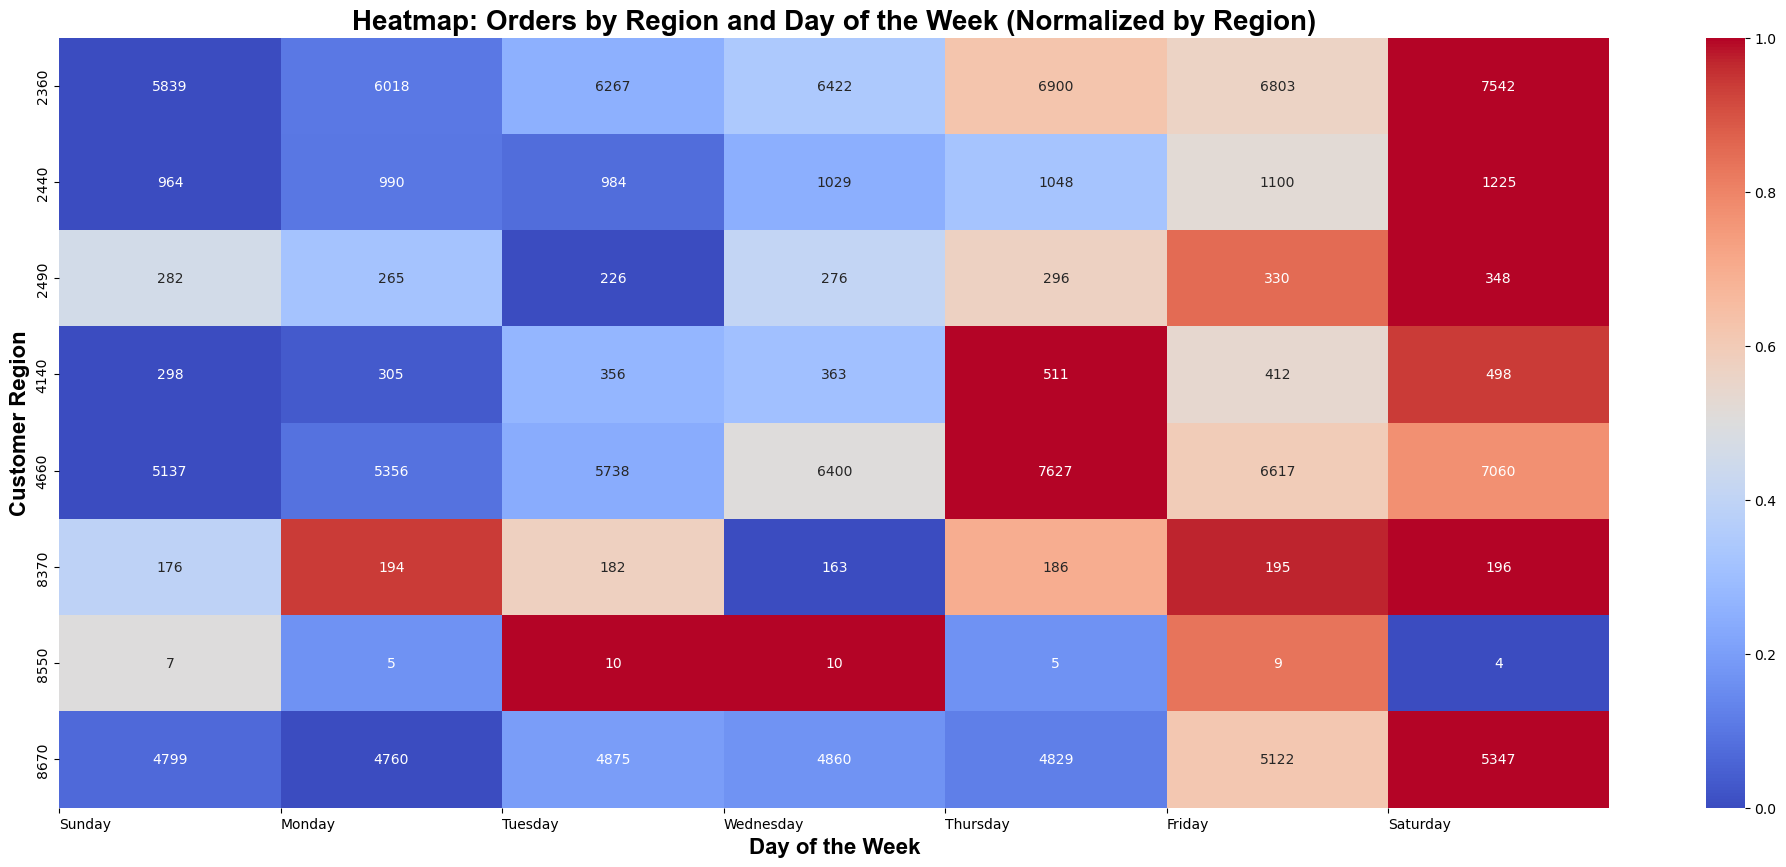

In [36]:
dow_columns = [f'DOW_{hour}' for hour in range(7)]

# Melting the DataFrame to have 'Hour' and 'Order Count' as separate columns
dow_data = df.melt(id_vars=['customer_region'], value_vars=dow_columns, var_name='DOW', value_name='Order Count')
dow_data['DOW'] = dow_data['DOW'].str.extract('(\d+)').astype(int)

# Creating a frequency table
heatmap_data = dow_data.pivot_table(index='DOW', columns='customer_region', values='Order Count', aggfunc='sum', fill_value=0)

# Normalizing the values of each column (age) individually
heatmap_data_normalized = heatmap_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Creating the heatmap with normalized data, but using the real values for annotations
plt.figure(figsize=(25, 10))
#Trasnposing the data to make it more readable
sns.heatmap(heatmap_data_normalized.T, cmap='coolwarm', annot=heatmap_data.T, fmt='g', annot_kws={"size": 10, "ha": 'center', "va": 'center'})
# Set the title and axis labels
plt.title('Heatmap: Orders by Region and Day of the Week (Normalized by Region)', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.xlabel('Day of the Week', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.ylabel('Customer Region', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})

# Set the x-axis labels to the names of the week
plt.xticks(ticks=np.arange(len(days)), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ha = 'left')
plt.show()


As we can observe from the plot analysis, almost all regions place a higher number of orders towards the end of the week, particularly on Thursday, Friday, and Saturday, with a drop during the week that begins on Sunday, similar to the overall distribution previously seen.

Only regions 8550 and 8730 are exceptions. Region 8550 has very few data points, so its analysis must be approached with this in mind. Keeping this in mind, we can see that this region has a peak of orders during the week, specifically on Tuesday and Wednesday.

On the other hand, region 8730, like all the others, shows a strong concentration of orders placed on Thursday, Friday, and Saturday, but also has an equally large peak of orders placed on Mondays.

# 5. Days of the Week vs. Customer Age
##### Objective: Understand how age groups behave in relation to ordering times.

In [37]:
pd.set_option('display.max_rows', None)
age_dow_sum = df.groupby('customer_age')[dow_columns].sum()
age_dow_sum

,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
customer_age,,,,,,,
15.0,17,19,10,8,18,9,7
16.0,50,47,40,55,56,70,56
17.0,135,138,145,149,182,151,185
18.0,318,305,312,351,377,383,429
19.0,557,591,594,629,644,647,713
20.0,764,777,843,893,986,887,946
21.0,1041,1045,1100,1149,1348,1266,1406
22.0,1184,1302,1373,1393,1581,1465,1630
23.0,1377,1440,1417,1495,1699,1673,1717


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\andre\AppData\Local\Temp\ipykernel_11752\2679049536.py:3: SyntaxWarning: invalid escape sequence '\d'
  dow_data['DOW'] = dow_data['DOW'].str.extract('(\d+)').astype(int)


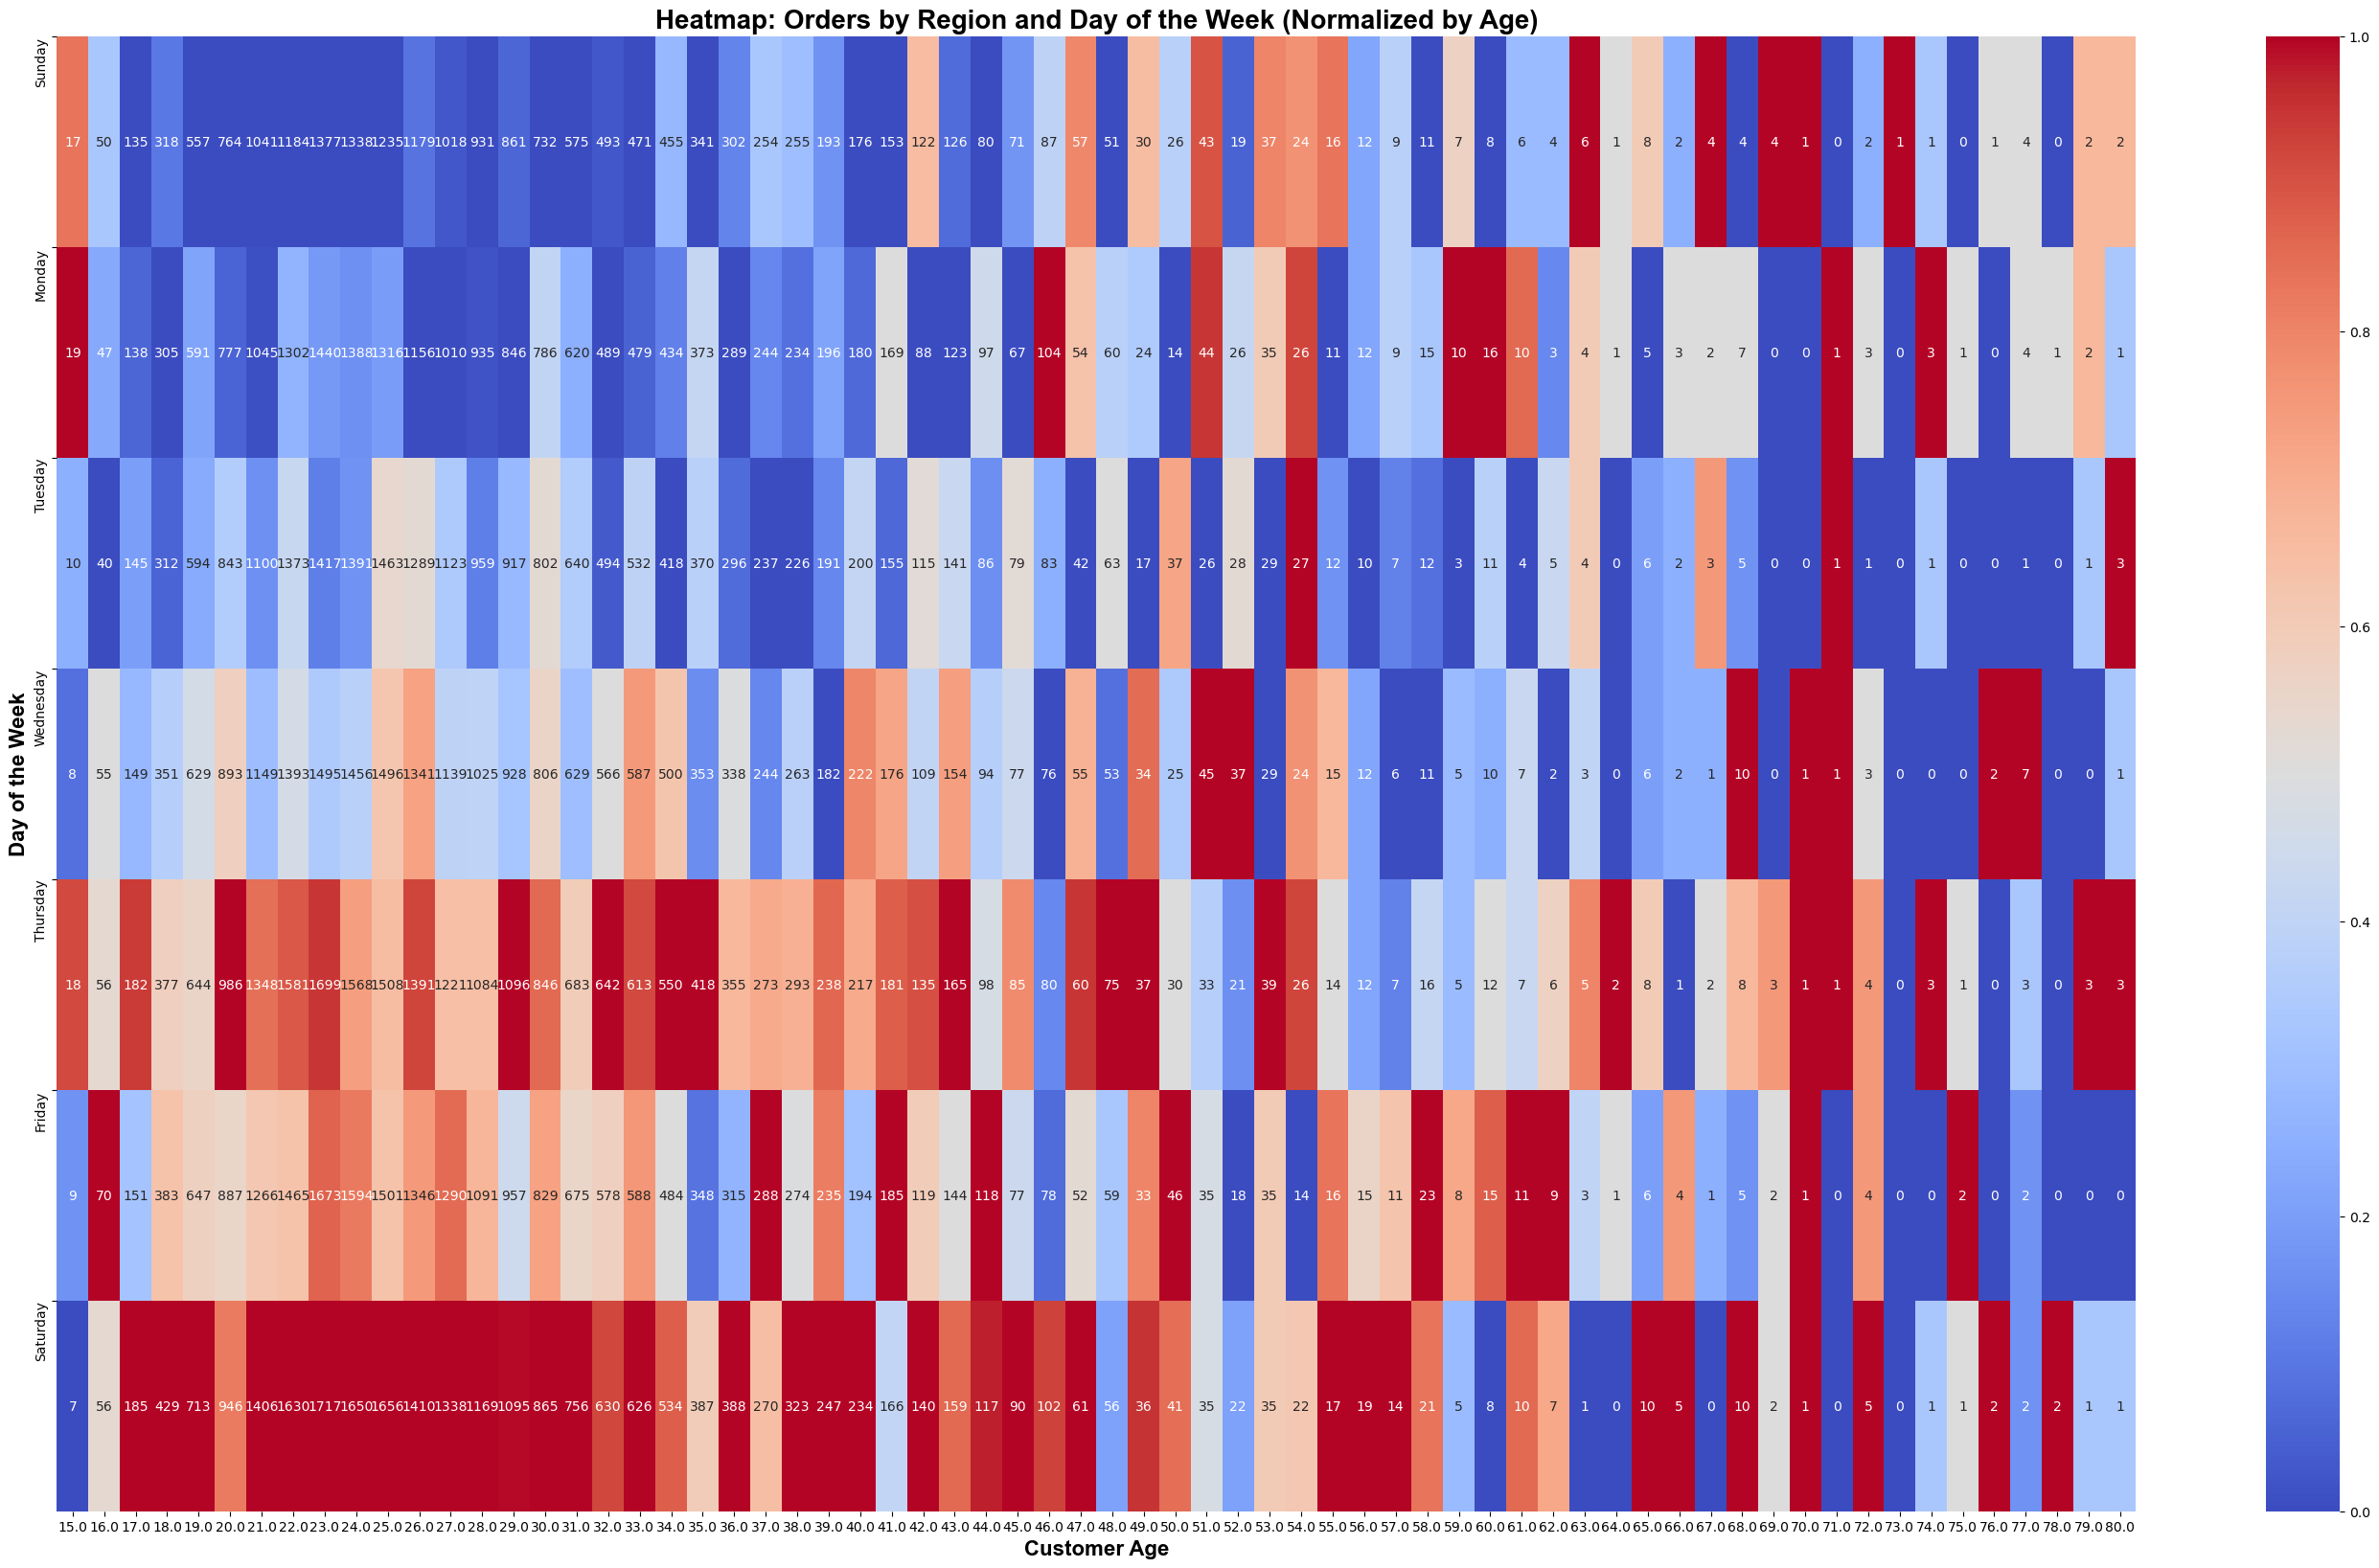

In [38]:
# Melting the DataFrame to have 'Hour' and 'Order Count' as separate columns
dow_data = df.melt(id_vars=['customer_age'], value_vars=dow_columns, var_name='DOW', value_name='Order Count')
dow_data['DOW'] = dow_data['DOW'].str.extract('(\d+)').astype(int)

# Creating a frequency table
heatmap_data = dow_data.pivot_table(index='DOW', columns='customer_age', values='Order Count', aggfunc='sum', fill_value=0)

# Normalizing the values of each column (age) individually
heatmap_data_normalized = heatmap_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

# Creating the heatmap with normalized data, but using the real values for annotations
plt.figure(figsize=(35, 20))
# Create the heatmap
ax = sns.heatmap(heatmap_data_normalized, cmap='coolwarm', annot=heatmap_data, fmt='g', annot_kws={"size": 10, "ha": 'center', "va": 'center'})

# Set the title and axis labels
plt.title('Heatmap: Orders by Region and Day of the Week (Normalized by Age)', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.xlabel('Customer Age', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})

plt.ylabel('Day of the Week', 
           fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})

# Set custom y-tick positions (if necessary) and labels
tick_positions = np.arange(len(days))  # Default positions for 7 days (0 to 6)
ax.set_yticks(tick_positions)  # Set the y-tick positions
ax.set_yticklabels(days)  # Set the labels

# Optionally: If you want to adjust the position of the y-ticks on the heatmap
for tick in ax.get_yticklabels():
    tick.set_verticalalignment('top')  

plt.show()

We can see that the order placement behavior across different days changes with the customer's age. Customers between the ages of 16 and 40 tend to focus their orders between Thursday and Saturday, with a particular emphasis on Saturdays. Starting from the age of 40, customers also begin to focus their orders on Sunday and Monday. The exception to this pattern appears to be customers aged 15, who also show a strong tendency to place orders on Sunday and Monday.